# Visualizing the presence of Long-Acting Reversible Contraception related content on websites across states  
This notebook presents a visual overview of the statewise distribution of content on Long-Acting Reversibe Contraception("LARC") on Student Health Center(SHC) websites of public universities in the US. 

## TOC:
* [Introduction](#second-bullet)
* [Data Description](#second-bullet)
* [Data Snapshots](#first-bullet)
* [Statewise Distribution Plots](#second-bullet)
* [Conclusion](#second-bullet)

## Introduction:
Long-acting reversible contraception (LARC) is recommended as a first-line method for
adolescents and young women, a group at high risk of unintended pregnancy. However, despite
increases in LARC use over the past 10 years in the United States (U.S.), adolescents and young adults
adopt LARC at sub-optimal rates. A university Student Health Center website can be the first resource for students to find resources that influence their contraceptive choices. The number of clicks required to reach LARC content starting at the SHC Homepage can be a measure to quantify the ease of finding information on LARC. This notebook presents a visual overview of the statewise distribution of content on Long-Acting Reversibe Contraception("LARC") on Student Health Center(SHC) websites of public universities in the US.

## Data Description:
We have use two data file in this example:
File1: 'SHC website data.csv'
We have curated information for a list of 591 public universities in the US with respect to their information on LARC content on their SHC websites. This information has been collected using an automated headless browsing technique that starts from the homepage of the SHC website and gathers information as it automatically visits links on the webpage. 

File2: 'Univsities with LARC.csv'
The 'Universities with LARC.csv' file contains the information that the algorithm collects for univesities that have LARC. This is a list of 151 universities that were found to have LARC on their SHC websites. 

## Data Snapshots:

To view the columns for the data colleceted for all websites under study:

In [22]:
#Load libraries and data file
import pandas as pd
import numpy as np

#list columns 
state_data = pd.read_csv("SHC website data.csv")
for col in state_data.columns:
    print(col)

State Code
# of SHC websites 
# LARC present 
# 0 clicks
# 1 click
# 2 clicks
# 3 clicks
# 4 clicks 
# dedicated sections
# external links


#### State Code:
Specifies the State Code for each state.

#### #of SHC websites:
Total number of SHC websites under study for each state.

#### #LARC present: 
This is the total number of SHC websites that had LARC content for each US State.

#### #clicks: 
The file "SHC website data.csv" contains information on the minimum number of clicks or the shortest path to a LARC term on the website. Here, we consider the first mention of a LARC term closest from the landing page on an SHC website. For example, a LARC term that is one click away means you need one click to reach that page from the landing page.

#### #dedicated sections: 
In the course of this study, we have also looked for dedicated section for womens health. For eg, sections on websites such as 'sexual health', 'reproductive health' have been listed for each SHC website. 

#### #external links: 
The presence of external websites conatining LARC such as "https://www.plannedparenthood.org/"has been recorded for each university website.


To view the university name with the SHC website link:

In [23]:
df = pd.read_csv('Universities with LARC.csv')
#snippet of the university names with the SHC website 
df.loc[:,['University', 'Student Health Center']].head()

,University,Student Health Center
0,Arizona State University Polytechnic,https://eoss.asu.edu/health
1,Arizona State University Tempe,https://eoss.asu.edu/health
2,Armstrong State University,https://auxiliary.georgiasouthern.edu/healthse...
3,Bemidji State University,https://www.bemidjistate.edu/services/health-c...
4,Binghamton University,https://www.binghamton.edu/health/


A vocabulary of LARC terms has been used for this study. A snippet of the terms found on the respective SHC websites is as below:

In [24]:
# snippet of with LARC  terms found on them
df.loc[:,['Student Health Center', 'Terms Found']].head()

,Student Health Center,Terms Found
0,https://eoss.asu.edu/health,['iud']
1,https://eoss.asu.edu/health,['iud']
2,https://auxiliary.georgiasouthern.edu/healthse...,['depo-provera']
3,https://www.bemidjistate.edu/services/health-c...,['contracept shot']
4,https://www.binghamton.edu/health/,['depoprovera']


In [25]:
df.loc[:,['Student Health Center', 'Womens Health/Contraception Related Sections', ]].head()

,Student Health Center,Womens Health/Contraception Related Sections
0,https://eoss.asu.edu/health,['Sexual Health']
1,https://eoss.asu.edu/health,['Sexual Health']
2,https://auxiliary.georgiasouthern.edu/healthse...,"['Sexual Assault Assistance', 'Prevention of M..."
3,https://www.bemidjistate.edu/services/health-c...,"['Birth Control', 'Sexual Health', 'Sexual hea..."
4,https://www.binghamton.edu/health/,['Women’s services']


In [26]:
# Filter records of universities that have point to external resources on LARC and print a snippet.
filtered_records = df[df['Whether Womens Health/Contraception Related Ext Resources'] == "TRUE"]
for index, row in filtered_records.head().iterrows():
    print(row['Student Health Center'], ":" ,row['Womens Health/Contraception Related Ext Resources'] ,"\n")

https://www.cpp.edu/~healthcounseling/ : ['https://www.plannedparenthood.org/learn/birth-control', 'http://www.ashasexualhealth.org/pdfs/ContraceptiveOptions.pdf', 'https://www.plannedparenthood.org/learn/birth-control/fertility-awareness/whats-temperature-method-fams', 'https://www.plannedparenthood.org/learn/birth-control/fertility-awareness/whats-cervical-mucus-method-fams', 'https://www.plannedparenthood.org/learn/birth-control/fertility-awareness/whats-calendar-method-fams'] 

http://www.calstatela.edu/studenthealthcenter : ['http://www.plannedparenthood.org/'] 

http://studenthealth.cofc.edu/ : ['http://www.smartersex.org/', 'http://www.womenshealth.gov/publications/our-publications/fact-sheet/birth-control-methods.html'] 

https://www.gc.cuny.edu/Prospective-Current-Students/Student-Life/Health-Wellness/Health-Services : ['https://www.plannedparenthood.org/', 'http://www.plannedparenthood.org/health-topics/birth-control-4211.htm', 'http://www.plannedparenthood.org/'] 

https://h

## Statewise Distribution Plots:

We use the geoplot and geopandas libraries to plot information collected in the above columns on a statewise basis on a United States map. Geoplot is a high-level geospatial plotting library and geopandas extends the pandas library that supports plotting geospatial data.

To be able to plot data state-wise on a US map, we need a shapefile with co-ordinates and state boundaries for the states. We have used the shapefile from the US Census Bureau TIGER database to visualize state boundaries. The commands to get and unzip the database folder are as follows:

```
wget https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip
mkdir maps
cd maps unzip ../cb_2018_us_state_20m.zip
```

The shapefile is placed in the maps subdirectory. Load the necessary libraries and the shapefile as below to access the geometry column for specifying the polygon shape. Assuming geopandas and geoplot has been installed

In [27]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

#the magic command
%matplotlib inline

In [28]:
usa = gpd.read_file("maps/cb_2018_us_state_20m.shp")
#gpd.options.display.max_columns = 5
usa.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


To plot the distribution of LARC content statewise, merge the data file with the shape file on the State Code columns

In [29]:
data_shape = usa.merge(state_data, left_on="STUSPS", right_on="State Code")

data_shape.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State Code,# of SHC websites,# LARC present,# 0 clicks,# 1 click,# 2 clicks,# 3 clicks,# 4 clicks,# dedicated sections,# external links
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",MD,12,7,1,5,1,0,0,4,2
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",IA,3,1,1,0,0,0,0,0,0
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",DE,2,1,0,0,1,0,0,1,0
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",OH,16,5,0,2,2,1,0,4,1
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",PA,39,11,2,3,5,1,0,8,2


Load one of the sample datasets from geoplot for plotting the map of the united states. 

<Axes: >

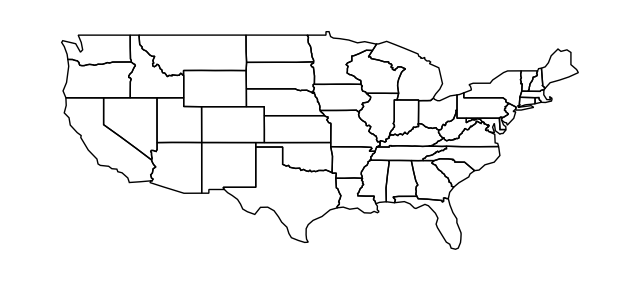

In [30]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)
gplt.polyplot(contiguous_usa)

Before merging the "contiguous_usa" dataset with the "data_shape" dataframe, make sure there is just one 'geometry' columns.

In [31]:
data_shape = data_shape.drop(columns=["geometry"])
merged_states = data_shape.merge(contiguous_usa, left_on="NAME", right_on="state")
print("merged_states")
merged_states.head()

merged_states


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,State Code,...,# 1 click,# 2 clicks,# 3 clicks,# 4 clicks,# dedicated sections,# external links,state,adm1_code,population,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,MD,...,5,1,0,0,4,2,Maryland,USA-3557,5773552,"POLYGON ((-75.04838 38.44877, -75.05673 38.404..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,IA,...,0,0,0,0,0,0,Iowa,USA-3529,3046355,"POLYGON ((-90.15664 42.10374, -90.21007 41.834..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,DE,...,0,1,0,0,1,0,Delaware,USA-3555,897934,"POLYGON ((-75.31987 38.95995, -75.07183 38.782..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,OH,...,2,2,1,0,4,1,Ohio,USA-3550,11536504,"POLYGON ((-82.21066 38.57948, -82.34083 38.440..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,PA,...,3,5,1,0,8,2,Pennsylvania,USA-3560,12702379,"POLYGON ((-74.89175 40.08179, -75.12882 39.949..."


The following chloropleth shows the total number of universities under study in each state:

<GeoAxes: >

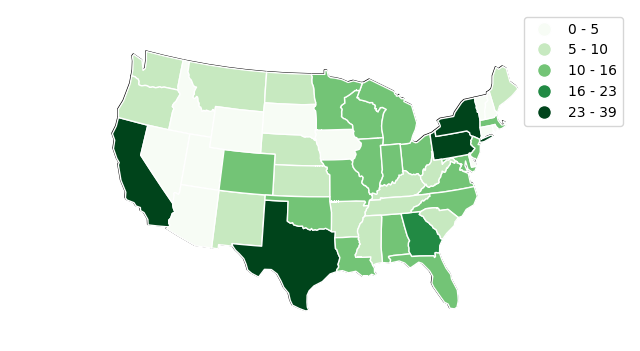

In [32]:
gdf = gpd.GeoDataFrame(merged_states)

ax = gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  gdf,
  hue="# of SHC websites ",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  label = "# of SHC websites under study",
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

For statewise distribution of percentage of universities that have Larc:

<GeoAxes: >

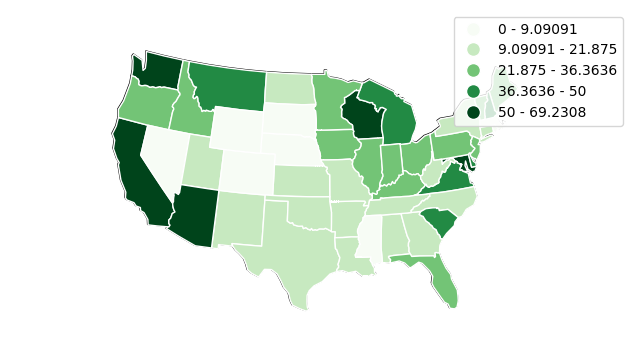

In [33]:
#for percentage of universities that have larc
merged_states['larc %'] = merged_states['# LARC present ']/merged_states['# of SHC websites '] * 100

gdf = gpd.GeoDataFrame(merged_states)

ax = gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  gdf,
  hue="larc %",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

To visualize the presence of dedicated women's health sections on websites:

<GeoAxes: >

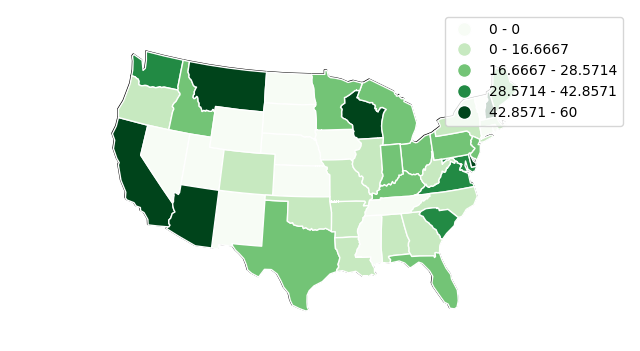

In [34]:
#for percentage of universities with womens health sections
merged_states['women health section %'] = merged_states['# dedicated sections']/merged_states['# of SHC websites '] * 100

gdf = gpd.GeoDataFrame(merged_states)

ax = gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  gdf,
  hue="women health section %",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

Visualizing the presence of external resources on websites:

In [ ]:
#for percentage of universities with external resources
merged_states['external resources %'] = merged_states['# external links']/merged_states['# of SHC websites '] * 100

gdf = gpd.GeoDataFrame(merged_states)

ax = gplt.polyplot(gdf, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
  gdf,
  hue="external resources %",
  edgecolor="white",
  linewidth=1,
  cmap="Greens",
  legend=True,
  scheme="FisherJenks",
  projection=gcrs.AlbersEqualArea(),
  ax=ax
)

#### Top 3 states with LARC content on their SHC websites:

In [36]:
grouped_df = df.groupby('State Code')

In [37]:
group_sizes = grouped_df.size()

In [38]:
print(group_sizes.sort_values(ascending = False).iloc[:3])

State Code
CA    19
PA    11
WI     9
dtype: int64


<Axes: title={'center': 'Statewise LARC distribution(Top 3)'}, xlabel='State Code'>

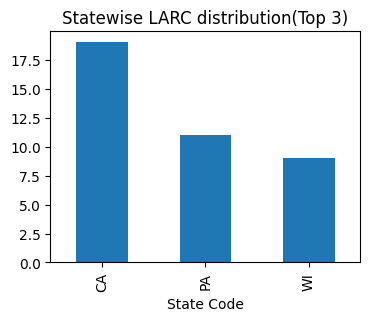

In [39]:
group_sizes.sort_values(ascending = False).iloc[:3].plot.bar(figsize=(4,3), title='Statewise LARC distribution(Top 3)')

# Conclusion: 
This notebook uses various plots in an attempt to visualize the sentiment around contraception - specifically 'LARC' in US states through data on their respective university Student Health Center webpages.